In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis¶

In [7]:
for column in df.columns:
    print(f"Column: {column}")
    print(f"Frequency:\n{df[column].value_counts()}\n")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Mode:\n{df[column].mode()}")
    print(f"Variance: {df[column].var()}")
    print(f"Standard Deviation: {df[column].std()}")
    print(f"Skewness: {df[column].skew()}")
    print(f"Kurtosis: {df[column].kurt()}")
    print("----------\n")

Column: Pregnancies
Frequency:
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Mean: 3.8450520833333335
Median: 3.0
Mode:
0    1
dtype: int64
Variance: 11.354056320621465
Standard Deviation: 3.3695780626988694
Skewness: 0.9016739791518588
Kurtosis: 0.15921977754746486
----------

Column: Glucose
Frequency:
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

Mean: 120.89453125
Median: 117.0
Mode:
0     99
1    100
dtype: int64
Variance: 1022.2483142519557
Standard Deviation: 31.97261819513622
Skewness: 0.17375350179188992
Kurtosis: 0.6407798203735053
----------

Column: BloodPressure
Frequency:
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84  

### Bivariate analysis: Linear and logistic regression modeling

In [8]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Prepare the data
X_linear = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_linear = df['Outcome']

# Fit the linear regression model
model_linear = LinearRegression()
model_linear.fit(X_linear, y_linear)

# Print the coefficients
print('Linear Regression Coefficients:')
for feature, coef in zip(X_linear.columns, model_linear.coef_):
    print(f'{feature}: {coef}')

# Make predictions
predictions_linear = model_linear.predict(X_linear)


Linear Regression Coefficients:
Glucose: 0.005932504680360896
BloodPressure: -0.002278837125420892
SkinThickness: 0.00016697889986788824
Insulin: -0.00020961695141379143
BMI: 0.013310837289280038
DiabetesPedigreeFunction: 0.1376781570786881
Age: 0.005800684345071745


In [9]:
# Prepare the data
X_logistic = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_logistic = df['Outcome']

# Fit the logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_logistic, y_logistic)

# Print the coefficients
print('Logistic Regression Coefficients:')
for feature, coef in zip(X_logistic.columns, model_logistic.coef_[0]):
    print(f'{feature}: {coef}')

# Make predictions
predictions_logistic = model_logistic.predict(X_logistic)

Logistic Regression Coefficients:
Glucose: 0.03454640995997162
BloodPressure: -0.012211780750903808
SkinThickness: 0.001001635850179147
Insulin: -0.001349855986344679
BMI: 0.087815178613656
DiabetesPedigreeFunction: 0.8190959696840165
Age: 0.03269666757391944


### Multiple Regression analysis

In [10]:
import statsmodels.api as sm

# Split the dataset into the independent variables (X) and the dependent variable (y)
X = df.drop('Outcome', axis=1)  # Independent variables
y = df['Outcome']  # Dependent variable

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           7.36e-55
Time:                        19:33:08   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [11]:
corr= df.corr()

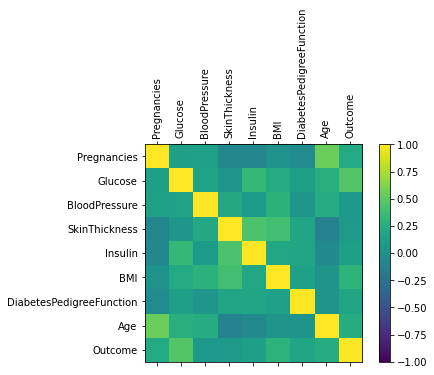

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = df.columns
# Rotate x-tick labels by 90 degrees
ax.set_xticklabels(names,rotation=90)
ax.set_yticklabels(names)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

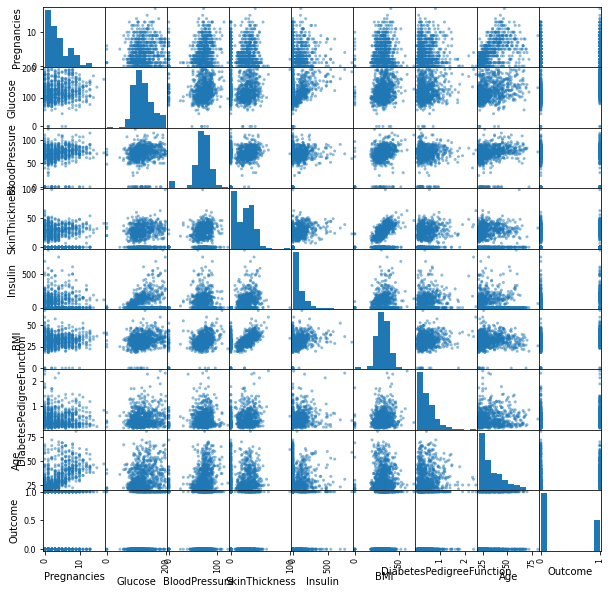

In [13]:
# Import required package
from pandas.plotting import scatter_matrix

plt.rcParams['figure.figsize'] = [10, 10]
# Plotting Scatterplot Matrix
scatter_matrix(df)
plt.show()